In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def calculate_profit(ticker , from_date , to_date):
    filename = ('stocks/{0}.csv').format(ticker)
    data = pd.read_csv(filename)
    data = data.loc[ (data['Date'] >= from_date) & (data['Date'] <= to_date)]
    change_Percent  =  (data.iloc[-1]['Adj Close'] -  data.iloc[0]['Adj Close']) * 100 /  data.iloc[0]['Adj Close']
    print(ticker, np.round(change_Percent,3))
    

In [6]:
df = pd.read_csv('stocks/total_data_price_Symbol.csv', index_col='Symbol')
df.head()

,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-19,2019-02-20,2019-02-21,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
Symbol,,,,,,,,,,,,,,,,,,,,,
A,75.145678,74.977549,74.905022,75.478650,75.956675,76.266566,76.672066,76.761075,77.268776,77.133611,...,83.646706,83.553805,83.573713,83.985128,84.592298,84.854411,84.940674,84.993759,84.920527,84.933851
AAL,36.135525,35.829624,35.773708,35.635560,35.704636,35.546753,35.316507,35.073104,34.727735,34.704711,...,27.790633,27.963329,28.172555,28.424956,28.856693,29.065921,29.275147,28.989536,28.697282,28.368497
AAP,159.906713,160.222005,162.847234,164.427007,165.771154,166.969269,167.666239,167.891917,166.982544,164.101756,...,155.066177,156.003169,157.013077,157.079549,157.744339,159.103836,159.486094,158.947617,158.465642,158.761475
AAPL,169.694194,168.701197,167.367009,167.590144,167.514664,167.964223,167.810003,168.056107,168.459712,168.669718,...,277.063985,278.586243,278.639313,278.317607,279.730418,281.139913,284.612254,286.535797,288.940236,290.180583
ABBV,72.803335,72.797213,73.008336,73.240878,73.583570,73.813049,74.094543,74.011930,73.849765,73.207219,...,86.636609,87.119456,86.905579,86.649572,86.947703,87.297684,87.472677,87.132416,86.701421,86.283389


In [7]:
symbols = df.index.to_numpy()
data = df.to_numpy()


In [8]:
# define normalizer
normalizer = Normalizer()

# create a K-means model with 20 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000 , n_init = 30)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [9]:
pipeline.fit(data)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=30, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [10]:
# predict cluster labels
labels = pipeline.predict(data)

# create a DataFrame aligning labels & companies
df_result = pd.DataFrame({'Cluster': labels, 'Symbol': symbols})

# display df sorted by cluster labels
df_result.sort_values('Cluster')

,Cluster,Symbol
109,0,CPB
271,0,LDOS
303,0,MKTX
21,0,AIZ
390,0,RMD
...,...,...
338,9,NVDA
461,9,VRTX
451,9,URI
272,9,LEG


In [11]:
cls = 7
symbols =  df_result[df_result['Cluster'] == cls]['Symbol'].tolist()
print(cls, symbols)

7 ['ACN', 'AIG', 'AJG', 'AKAM', 'ALL', 'AMT', 'AON', 'APD', 'AWK', 'AZO', 'BLL', 'BR', 'CAG', 'CB', 'CBOE', 'CCI', 'CERN', 'CINF', 'CME', 'CMG', 'CMS', 'COST', 'CTAS', 'DFS', 'DGX', 'DHR', 'DIS', 'DRE', 'EFX', 'EIX', 'EL', 'EQIX', 'EQR', 'ES', 'ETR', 'EVRG', 'FE', 'FIS', 'FLT', 'GPN', 'HAS', 'HD', 'HIG', 'HSY', 'ICE', 'IDXX', 'J', 'JCI', 'KMB', 'KO', 'LHX', 'LIN', 'LMT', 'LNT', 'MA', 'MAA', 'MCK', 'MCO', 'MDT', 'MKC', 'MSCI', 'MSFT', 'MSI', 'NDAQ', 'NEE', 'NEM', 'NOC', 'NVR', 'PAYC', 'PEAK', 'PEP', 'PG', 'PLD', 'RE', 'ROST', 'SBAC', 'SBUX', 'SNPS', 'SO', 'SPGI', 'SRE', 'STE', 'TFX', 'TSN', 'TTWO', 'TXN', 'V', 'VMC', 'VRSK', 'WDC', 'WEC', 'WELL', 'WMT', 'WRB', 'XEL', 'ZTS']


In [12]:
for s in symbols: 
    calculate_profit(s , '2019-01-01' , '2019-12-31')

ACN 51.665
AIG 32.873
AJG 35.103
AKAM 46.382
ALL 40.505
AMT 49.558
AON 46.001
APD 50.45
AWK 40.897
AZO 42.08
BLL 45.992
BR 32.196
CAG 65.732
CB 24.763
CBOE 26.668
CCI 38.877
CERN 42.565
CINF 42.178
CME 11.167
CMG 88.81
CMS 33.643
COST 44.954
CTAS 62.216
DFS 45.874
DGX 33.722
DHR 53.453
DIS 34.347
DRE 42.332
EFX 52.459
EIX 37.656
EL 58.108
EQIX 70.096
EQR 30.618
ES 37.772
ETR 47.866
EVRG 20.265
FE 37.163
FIS 38.703
FLT 55.063
GPN 79.163
HAS 35.524
HD 30.113
HIG 43.029
HSY 42.516
ICE 24.471
IDXX 43.116
J 54.939
JCI 36.979
KMB 26.97
KO 21.679
LHX 50.9
LIN 38.016
LMT 50.881
LNT 36.993
MA 58.244
MAA 47.208
MCK 23.808
MCO 70.275
MDT 31.741
MKC 26.954
MSCI 77.785
MSFT 58.259
MSI 42.513
NDAQ 34.82
NEE 46.038
NEM 31.16
NOC 41.837
NVR 57.319
PAYC 121.186
PEAK 33.704
PEP 28.775
PG 40.68
PLD 60.485
RE 32.664
ROST 40.36
SBAC 50.357
SBUX 39.258
SNPS 65.616
SO 52.347
SPGI 62.353
SRE 45.935
STE 47.838
TFX 49.793
TSN 74.811
TTWO 17.71
TXN 39.637
V 42.27
VMC 48.959
VRSK 38.413
WDC 71.169
WEC 40.454
WELL

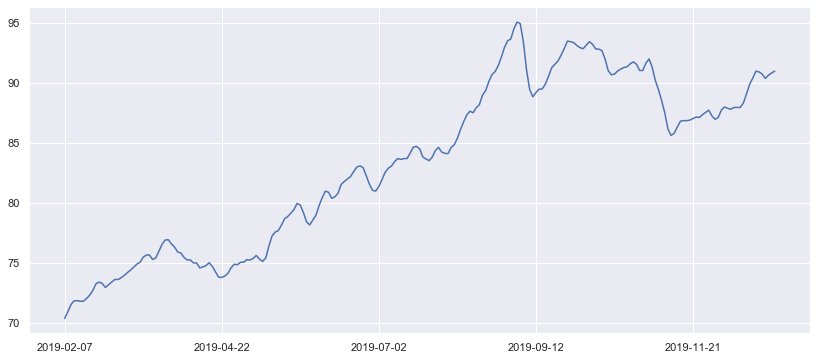

In [16]:
sns.set(rc={'figure.figsize':(14, 6)})
df.loc['WEC'].plot()

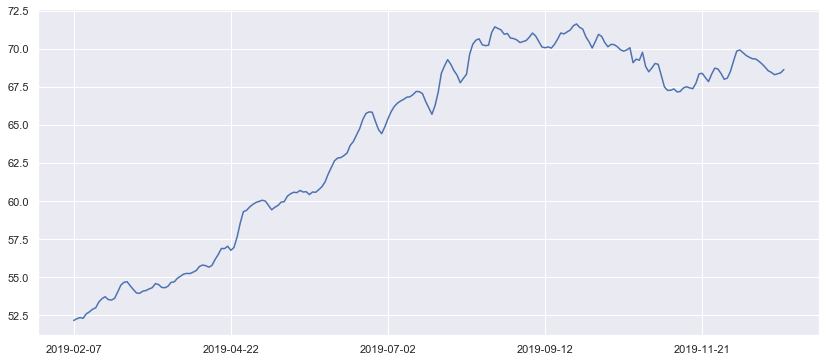

In [15]:
df.loc['WRB'].plot()